In [1]:
import tensorflow as tf
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras import optimizers, initializers, metrics, regularizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2

Strategy-1> 규제를 도입한 CNN모델
---------------------------------------------------------
1. L2, DropOut, BatchNormalization을 모두 도입해서 과적합을 피하게 한다. 
2. conv2d * 2 + conv2d * 2 + conv2d * 3 -> flatten() -> softmax 순으로 계층을 쌓는다.

In [2]:
seed = 0
np.random.seed(3)
tf.compat.v1.set_random_seed(3)

train_datagen = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip=True,     #수평 대칭 이미지를 50% 확률로 만들어 추가합니다.
                                  width_shift_range=0.1,  #전체 크기의 10% 범위에서 좌우로 이동합니다.
                                  height_shift_range=0.1, #마찬가지로 위, 아래로 이동합니다.
                                  rotation_range=5,
                                  shear_range=0.7,
                                  zoom_range=[0.9, 2.0],
                                  vertical_flip=True,
                                  fill_mode='nearest') 

train_generator = train_datagen.flow_from_directory(
       './Data/Train',   #학습셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=5,
       class_mode='sparse')

#테스트 셋은 이미지 부풀리기 과정을 진행하지 않습니다.
validation_datagen = ImageDataGenerator(rescale=1./255)  

validation_generator = validation_datagen.flow_from_directory(
       './Data/Validation',   #테스트셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=5,
       class_mode='sparse')

model = Sequential()
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3), padding='same', kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3),padding='same', kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3),padding='same',kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3),padding='same',kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3),padding='same',kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3),padding='same',kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3),padding='same',kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(5))
model.add(Activation('softmax'))
model.summary()

#모델을 컴파일 합니다. 
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=1E-5),
                  metrics=['accuracy'])

history = model.fit_generator(
           train_generator,
           steps_per_epoch=100,
           epochs=100,
           validation_data=validation_generator)
           #callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_schedule)])

model.save('SimpleCNN2.h5')

Found 325 images belonging to 5 classes.
Found 139 images belonging to 5 classes.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/100
100/100 [==============================] - 69s 687ms/step - loss: 3.4883 - acc: 0.1999 - val_loss: 2.1202 - val_acc: 0.2302
Epoch 2/100
100/100 [==============================] - 63s 634ms/step - loss: 3.2067 - acc: 0.2188 - val_loss: 2.1586 - val_acc: 0.2374
Epoch 3/100
100/100 [==============================] - 64s 640ms/step - loss: 2.9647 - acc: 0.3058 - val_loss: 2.1433 - val_acc: 0.2158
Epoch 4/100
100/100 [==============================] - 63s 628ms/step - loss: 2.7212 - acc: 0.3036 - val_loss: 2.0217 - val_acc: 0.3237
Epoch 5/100
100/100 [==============================] - 62s 618ms/step - loss: 2.7805 - acc: 0.3032 - val_loss: 1.7968 - val_acc: 0.4820
Epoch 6/100
100/100 [==============================] - 62s 620ms/step - loss: 2.6946 - acc: 0.3604 - val_loss: 1.5561 - 

100/100 [==============================] - 59s 594ms/step - loss: 1.4671 - acc: 0.6897 - val_loss: 1.1223 - val_acc: 0.7698
Epoch 58/100
100/100 [==============================] - 60s 597ms/step - loss: 1.4187 - acc: 0.6640 - val_loss: 1.1257 - val_acc: 0.7770
Epoch 59/100
100/100 [==============================] - 60s 603ms/step - loss: 1.4777 - acc: 0.6580 - val_loss: 1.1242 - val_acc: 0.7986
Epoch 60/100
100/100 [==============================] - 62s 620ms/step - loss: 1.4592 - acc: 0.6215 - val_loss: 1.1005 - val_acc: 0.8058
Epoch 61/100
100/100 [==============================] - 63s 630ms/step - loss: 1.4850 - acc: 0.6760 - val_loss: 1.1432 - val_acc: 0.8058
Epoch 62/100
100/100 [==============================] - 60s 600ms/step - loss: 1.4016 - acc: 0.7258 - val_loss: 1.1117 - val_acc: 0.7914
Epoch 63/100
100/100 [==============================] - 59s 592ms/step - loss: 1.4984 - acc: 0.6266 - val_loss: 1.1191 - val_acc: 0.8345
Epoch 64/100
100/100 [==============================] 

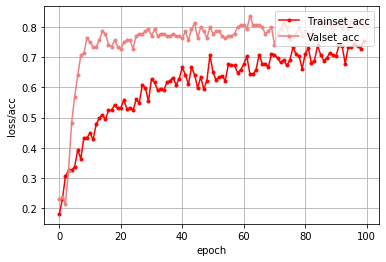

In [3]:
acc= history.history['acc']
val_acc= history.history['val_acc']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))  
plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c="lightcoral", label='Valset_acc')
#plt.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Testset_loss')
#plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right') 
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()

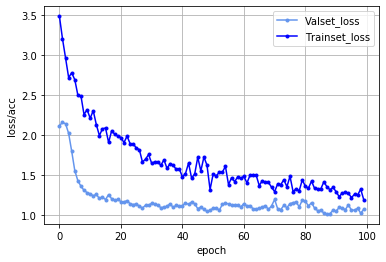

In [4]:
x_len = np.arange(len(y_loss))  
#plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
#plt.plot(x_len, val_acc, marker='.', c="lightcoral", label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Valset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right') 
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()

In [5]:
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

model = load_model('SimpleCNN2.h5')
print(model.summary())

test_datagen = ImageDataGenerator(rescale=1./255) #이미지를 0에서 1사이의 값으로 만들어줌
test_generator = test_datagen.flow_from_directory(
        './Data/Test/',
        target_size=(150, 150),
        class_mode='sparse',
        batch_size=1,
        shuffle=False)
test_loss, test_acc = model.evaluate_generator(test_generator, steps = 85)

print("test_acc:", test_acc)

probabilities = model.predict_generator(test_generator,85)
print("acc_matrix_size:", np.array(probabilities).shape)
print("test_Set_filesize:", len(test_generator.filenames))

#print (probabilities)
#print()
for i in range(len(test_generator.filenames)):
    print(probabilities[i]," : " ,test_generator.filenames[i])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo multiple                  12        
_________________________________________________________________
conv2d (Conv2D)              multiple                  896       
_________________________________________________________________
activation (Activation)      multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  9248      
________________________________